In [1]:
import csv
import datetime as dat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


file='daneOkresoweKSE.csv'

data = pd.read_csv(file) 

data.head()


data = pd.read_csv(file,skiprows=0,sep=';') 
data.head()


data.columns= ['Day','hour','minute','Load']

Using 315648 entries on 315648 available


/home/k01/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


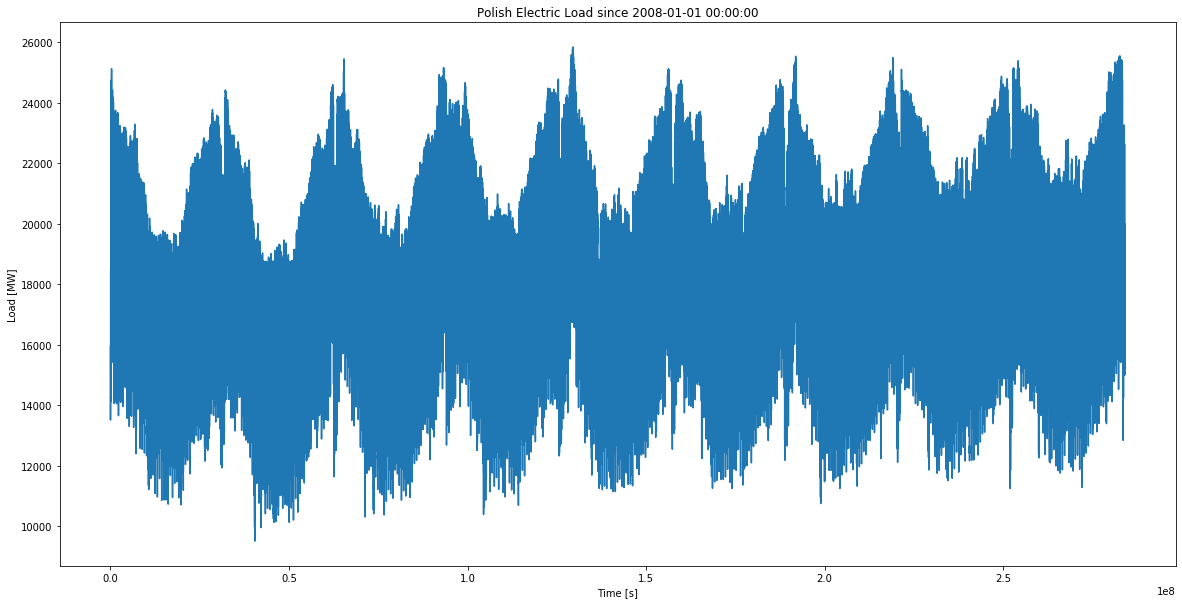

In [2]:
N= 315648# data.shape[0]
print("Using {} entries on {} available".format(N, data.shape[0]) )
load=np.zeros(N)
time=np.zeros(N)


txt0 = "{} {:02d}:{:02d}:00".format(data['Day'][0],data['hour'][0],0)
T0= dat.datetime.strptime(txt0,'%Y-%m-%d %H:%M:%S')

dday=0
for i in range(N):
    load[i]=data['Load'][i]
    
    if data['hour'][i]==24: 
        data['hour'][i]=0
        dday=1
    
    txt = "{} {:02d}:{:02d}:00".format(data['Day'][i],data['hour'][i],data['minute'][i])
    date= dat.datetime.strptime(txt,'%Y-%m-%d %H:%M:%S')
    if dday==1:
        date=date+dat.timedelta(days=1)
    Secs=(date-T0).total_seconds()
    time[i]=Secs
    dday=0

plt.figure(figsize=(20,10))
#plt.plot(time,load,',k')
plt.plot(time,load)

plt.xlabel('Time [s]')
plt.ylabel('Load [MW]')
plt.title('Polish Electric Load since {} {:02d}:{:02d}:00'.format(data['Day'][0],data['hour'][0],0) )
plt.show()
#
data1=data


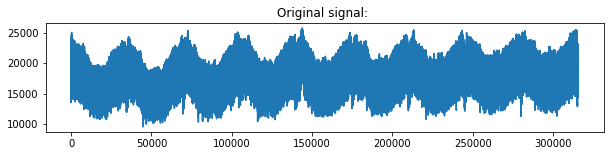

1.0 315648.0


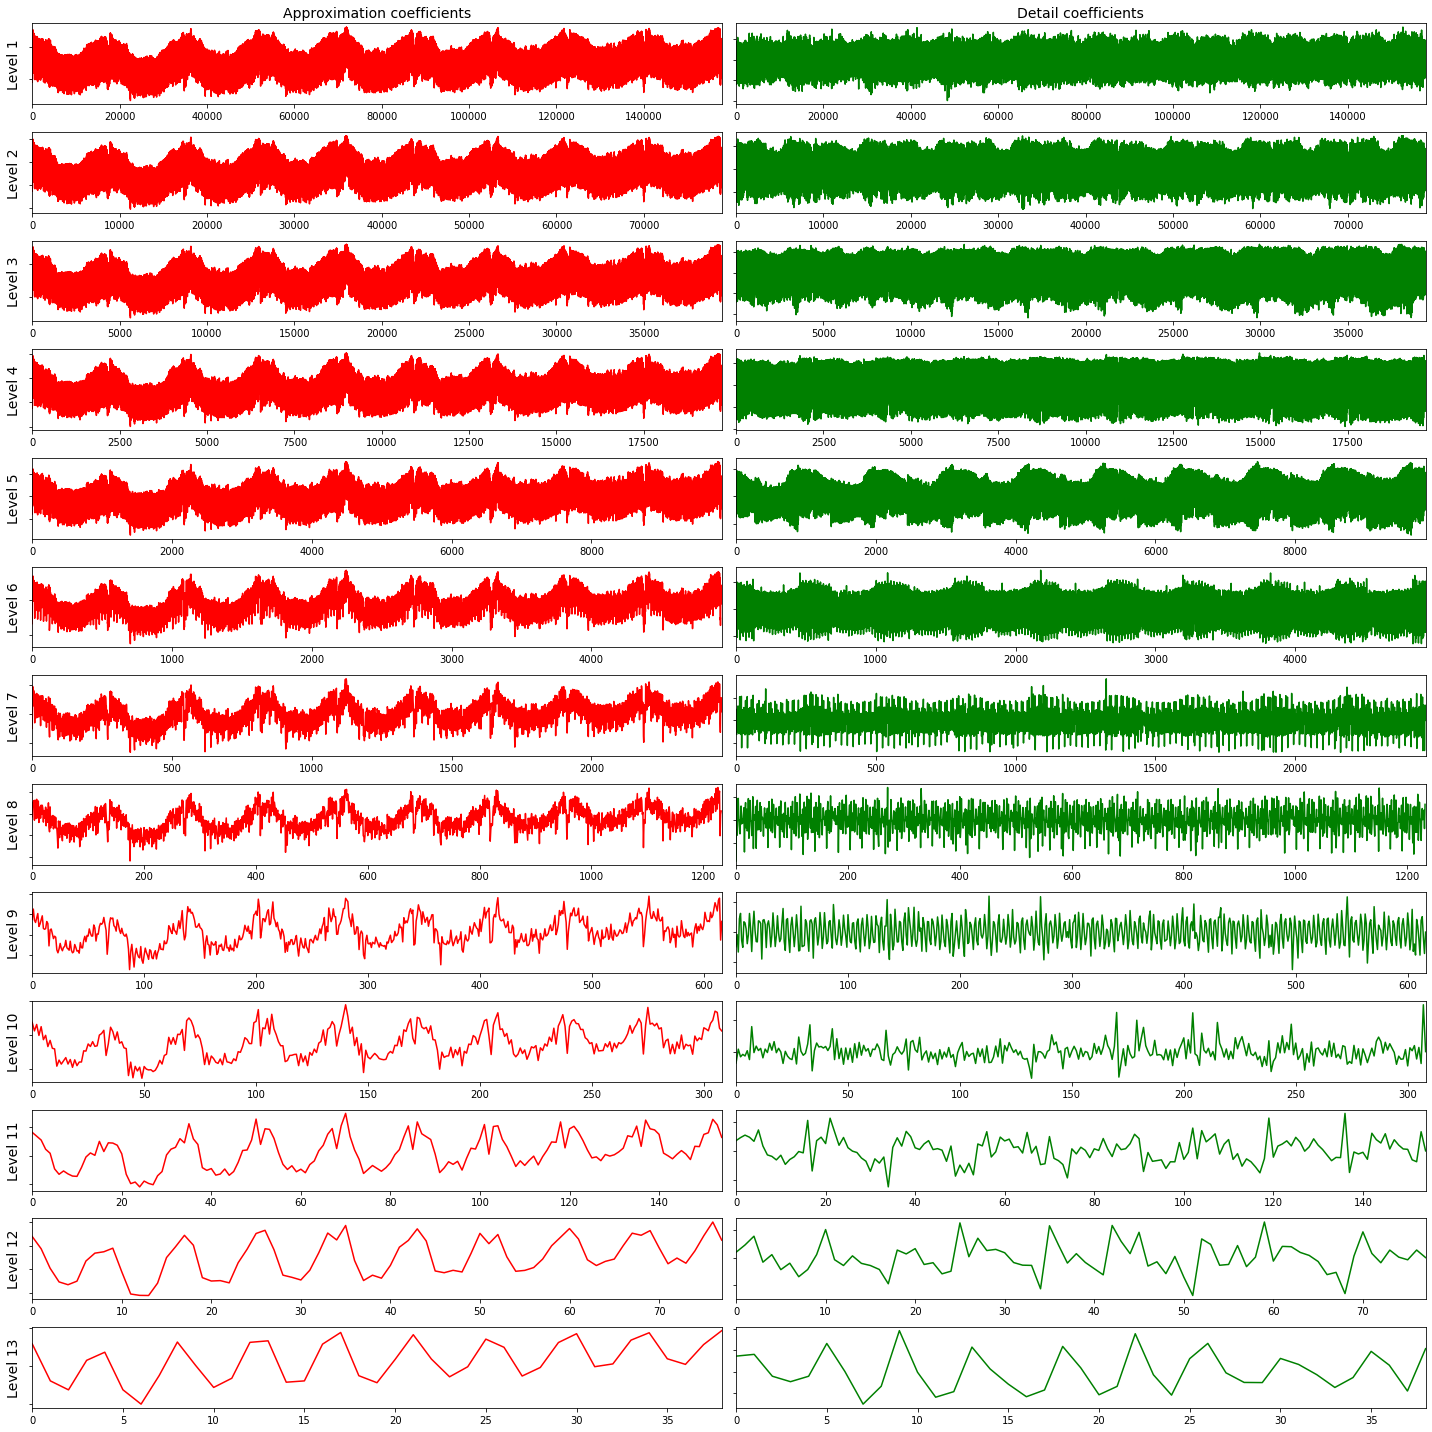

In [3]:
import pywt

#high pass filter-> detail coefficients
#low pass filter-> approximation coefficients
t=time[0:]/(15*60)
data=load[0:]

plt.figure(figsize=(10,2))
#plt.subplot(122)
plt.title("Original signal: ")
plt.plot(t, data)
plt.show()

print (t[0],t[-1])
cof=[]
# waveletname = 'sym5' #  'sym5' #'coif5'  #
waveletname = 'db1'
levels=13
dec=2
fig, axarr = plt.subplots(nrows=levels, ncols=2, figsize=(20,20))
for ii in range(levels):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 0].set_xlim(t[0]//dec,t[-1]//dec)
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 1].set_xlim(t[0]//dec,t[-1]//dec)
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
#     cof.append(coeff_d)
    dec=dec*2
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)        
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)        
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()


/home/k01/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


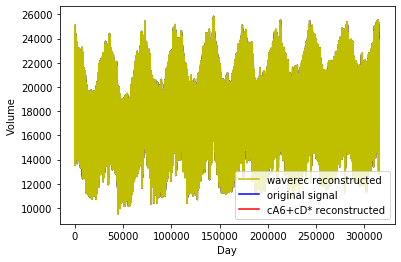

In [4]:
import numpy as np
import pywt
import matplotlib.pyplot as plt
data=load
n = len(data)
wl = pywt.Wavelet('db1')
coeff_all = pywt.wavedec(data, wl, level=6)
cA6, cD6,cD5, cD4, cD3, cD2, cD1= coeff_all
omp0 = pywt.upcoef('a',cA6,wl,level=6)[:n]
omp1 = pywt.upcoef('d',cD1,wl,level=1)[:n]
omp2 = pywt.upcoef('d',cD2,wl,level=2)[:n]
omp3 = pywt.upcoef('d',cD3,wl,level=3)[:n]
omp4 = pywt.upcoef('d',cD4,wl,level=4)[:n]
omp5 = pywt.upcoef('d',cD5,wl,level=5)[:n]
omp6 = pywt.upcoef('d',cD6,wl,level=6)[:n]


#cA6cD_approx = omp0 + omp1 + omp2 + omp3 + omp4+ omp5 + omp6
#plt.figure(figsize=(18,9))
recon = pywt.waverec(coeff_all, wavelet= wl)
# p1, =plt.plot(omp0 + omp6 + omp5 + omp4 + omp3 + omp2 + omp1,'r')
p1, =plt.plot(omp0 + omp6 + omp5 + omp4 + omp3 ,'r')
p2, =plt.plot(data, 'b')
p3, =plt.plot(recon, 'y')

plt.xlabel('Day')
plt.ylabel('Volume')
plt.legend([p3,p2,p1], ["waverec reconstructed","original signal", "cA6+cD* reconstructed"])
plt.show()

denoised=omp0 + omp6 + omp5 + omp4 + omp3

In [5]:
data1['Load']=denoised

# DAYLY PSF

In [6]:
#prendiamo una parte del dataset, una settimana, due settimane, 20 lunedì successivi e li sommiamo tra loro
#tenendo conto che
#Il profilo costante si rafforza, se prendiamo 100, 50 giornate... profilo tipico della giornata.
#Invece di prendere i dati, prendiamo i dati con le wavelets
#vediamo se ci conviene il livello 1 o 2 con le wavelets

#Va fatto con il dataset completo!!!!
#Settimane, giorni , minuti si susseguono senza discontinuità . quindi è possibile raggruppare il dataset 
#secondo questo criterio

In [7]:
3288-366

2922

In [8]:
2922*96

280512

In [9]:
week=np.zeros([2922,96])
for i in range(2922):
    for k in range(96):
        week[i][k]+=denoised[i*96+k]
            

In [10]:
2922/7

417.42857142857144

In [11]:
week2=np.zeros([7,96])
for i in range(417):
    for j in range(7):
        week2[j]+=week[j*417+i]
        

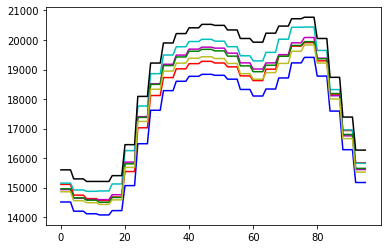

In [12]:
weekm=week2/417
plt.plot(weekm[0],'r',weekm[1],'b',weekm[5],'c', weekm[6],'k',  weekm[4],'m', weekm[3],'g',weekm[2],'tab:olive')
plt.show()

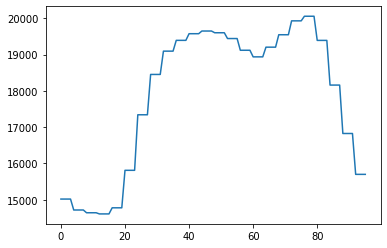

In [13]:
meanday=np.zeros(96)
for i in range(7):
    meanday+=weekm[i]
meanday=meanday/7
plt.plot(meanday)

Il primo Gennaio 2008 era martedì, quindi week[0] è martedì, week[1] mercoledì, week[2] giovedì, week[3] venerdì, week[4] sabato, week[5] domenica, week[6] lunedì.


In [14]:
meanday.sum()

1715965.6980815348

In [15]:
psf=meanday/1715965.6980815348

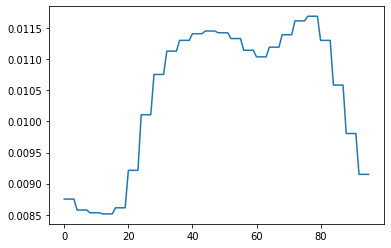

In [16]:
plt.plot(psf)

# Convolverò il segnale a pezzi di 200

in modo da azzerare la memoria del comando deconvolve.

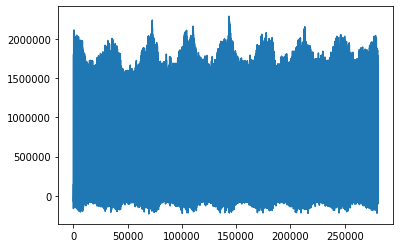

In [17]:
#dev'essere multiplo della finestre, quindi di 96, allora scelgo di prendere due finestre, quindi 192
import scipy
from scipy import signal
denoised1=denoised
denoised=denoised[:280512]
deconv=np.zeros(len(denoised))
for i in range(len(denoised)//96):
    deconv[i*96:(i+1)*96 +1] = scipy.signal.deconvolve(denoised[(i*96) : (i+2)*96], psf )[0]
    deconv[(i+1)*96:(i+2)*96+1] = scipy.signal.deconvolve(denoised[(i+1)*96:(i+3)*96], psf )[0]
plt.plot(deconv)

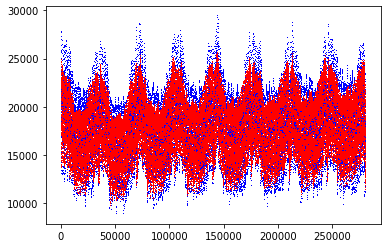

In [18]:
#il comando convolve mi taglia la parte finale del segnale sulla quale ho effetti di bordo
plt.plot(np.convolve(deconv, psf, 'valid')[:-96], ',b')
plt.plot(denoised, ',r')
plt.show()

In [19]:
96*7*3

2016

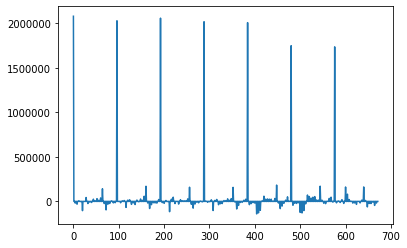

In [20]:
plt.plot(deconv[672:1344])

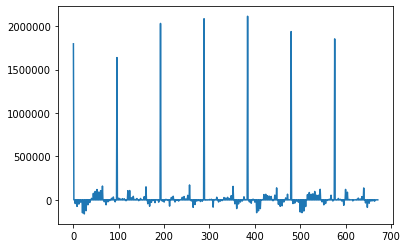

In [21]:
plt.plot(deconv[0:672])

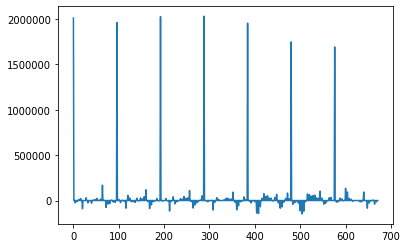

In [22]:
plt.plot(deconv[1344:2016])

In [23]:
spikedec=np.zeros(len(deconv))
for i in range(len(deconv)):
    if deconv[i]>500000:
        spikedec[i]=deconv[i]
    else:
        spikedec[i]=0.


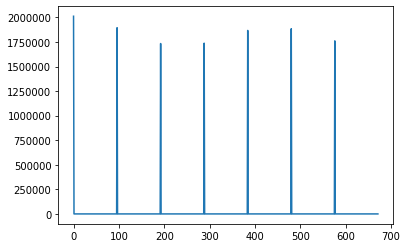

In [24]:
plt.plot(spikedec[-1344:-672])

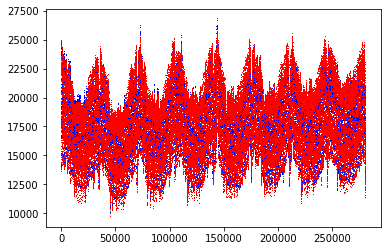

In [25]:
plt.plot(np.convolve(spikedec, psf, 'valid')[:-96], ',b')
plt.plot(denoised, ',r')
plt.show()

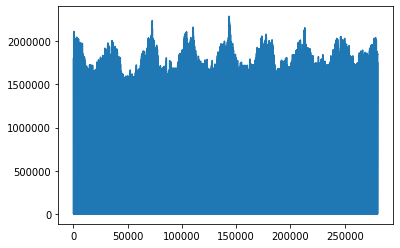

In [26]:
plt.plot(spikedec)

In [27]:
from scipy import signal 
peaks= signal.find_peaks(spikedec)

In [28]:
len(spikedec)/96

2922.0

Calcolare le delta caratteristiche della settimana e quando nella creazione dei giorni successivi incontro una festività metto la delta associata alla domenica. Potremmo riprodurre il 2016 per testare le capacità di forecasting.

In [29]:
delta=np.zeros([2922,96])
for i in range(2922):
    for k in range(96):
        delta[i][k]+=spikedec[i*96+k]
            

In [30]:
delta2=np.zeros([7,96])
for i in range(417):
    for j in range(7):
        delta2[j]+=delta[j*417+i]
        

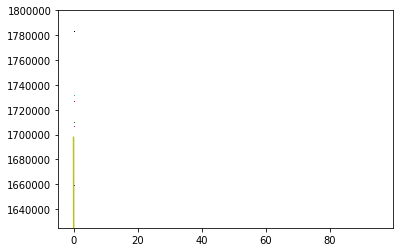

In [31]:
deltam=delta2/417
plt.plot(deltam[0],',r',deltam[1],',b',deltam[5],',c', deltam[6],',k',  deltam[4],',m', deltam[3],',g',deltam[2],'tab:olive')
# plt.plot(deltam[5])
plt.ylim(1625000,1800000)
plt.show()

Il primo Gennaio 2008 era martedì, quindi week[0] è martedì, week[1] mercoledì, week[2] giovedì, week[3] venerdì, week[4] sabato, week[5] domenica, week[6] lunedì.
Stesso discorso con le delta

Il 2016 è un anno bisestile, quindi ha 366 giorni. Siccome i giorni sono consecutivi, mi conviene prima mettere dentro tutta la settimana in ordine e poi andare ad inserire le festività.

In [34]:
366/7

52.285714285714285

In [35]:
#deve partire da martedì, ma il primo gennaio 2016 è venerdì
y2016=np.zeros([366,96])
y2016[0]=deltam[5]# mettiamo quella della domenica al primo gennaio
y2016[1]=deltam[4]
y2016[2]=deltam[5]
y2016[3]=deltam[6]

In [36]:
y2016

array([[1731255.8681946 ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [1706284.28979231,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [1731255.8681946 ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       ...,
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ],
       [      0.        ,       0.        ,       0.        , ...,
              0.        ,       0.        ,       0.        ]])

In [37]:
362/7

51.714285714285715

In [38]:
len(y2016)

366

In [39]:
51*7

357

In [40]:
for i in range(51):
    #i*96+k
    for k in range(7):
        y2016[i*7+k+4]=deltam[k]

    

In [41]:
y2016[360]

array([1782568.74639543,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,       0.        ,       0.        ,
             0.        ,

In [42]:
for i in range(5):
    y2016[361+i]=deltam[i]

In [43]:
#gennaio 31 #Febbraio 60 #marzo91 #aprile121 # maggio 152 #giugno 182 #luglio 213 #agosto 244 # settembre 274
# ottobre 305 # novembre 335 #dicembre 366

In [44]:
31+29+31+30+31+30+31+31+30+31+30+31

366

In [45]:
305+12


317

In [46]:
#dobbiamo includere le festività mettendo la delta della domenica, deltam[5]
#Ma dovevi mettere le festività Polacche!!!
#prendo solo i giorni legalente riconosciuti
y2016[5]=deltam[5]
y2016[40]=deltam[5]#mercoledì delle ceneri
y2016[79]=deltam[5]#le palme
y2016[84]=deltam[5]#Venerdì santo
y2016[87]=deltam[5]#Pasqua
y2016[88]=deltam[5]#Pasquetta
y2016[121]=deltam[5]#lavoratori
y2016[124]=deltam[5]#Festa nazionale polonia
y2016[129]=deltam[5]#europa
y2016[135]=deltam[5]#pentecoste
y2016[146]=deltam[5]#corpus domini e festa della mamma
y2016[227]=deltam[5]#Ferragosto
y2016[305]=deltam[5]#tutti i santi
y2016[315]=deltam[5]#Indipendenza Polonia
y2016[328]=deltam[5]# 1 Avvento
y2016[338]=deltam[5]#Secondo Avvento
y2016[345]=deltam[5]#3 Avvento
y2016[352]=deltam[5]#4 Avvento
y2016[359]=deltam[5]#natale
y2016[360]=deltam[5]#santo stefano
y2016[365]=deltam[5]#San silvestro

In [47]:
buh=np.zeros(366*96)
for i in range(366):
    buh[i*96:i*96+96]=y2016[i]
d2016y=buh

In [48]:
366*96

35136

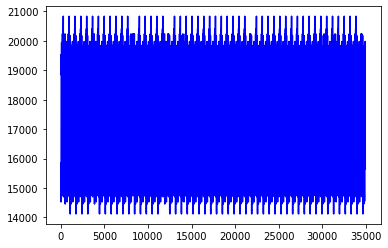

In [49]:
plt.plot(np.convolve(d2016y, psf, 'valid')[:-96], 'b')
#plt.plot(denoised[-35136:], ',r')
plt.show()

In [50]:
annonuovo=np.convolve(d2016y, psf, 'valid')[:-96]

In [51]:
denoised

array([15722.675, 15722.675, 15722.675, ..., 15573.25 , 15573.25 ,
       15573.25 ])

In [52]:
total=np.concatenate((denoised,annonuovo), axis= None)

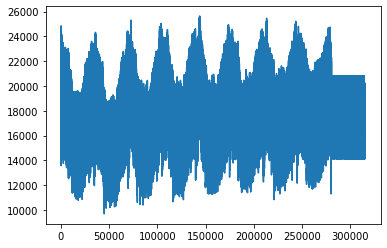

In [53]:
plt.plot(total)